# Image Operations

In [ ]:
import numpy as np
import cv2
from scipy import ndimage
import random
from google.colab.patches import cv2_imshow


# Task 1 - Z-Score Normalization 







In this task you're going to perform Z-Score Normalization on numpy arrays using the following function.

B i,j = (A i,j − μ A )/σ A

Where:

σ = standard dev.

μ = mean

In [ ]:
np.random.seed(20)
A=np.random.random((5,5))
print(A)

[[0.5881308  0.89771373 0.89153073 0.81583748 0.03588959]
 [0.69175758 0.37868094 0.51851095 0.65795147 0.19385022]
 [0.2723164  0.71860593 0.78300361 0.85032764 0.77524489]
 [0.03666431 0.11669374 0.7512807  0.23921822 0.25480601]
 [0.85762553 0.94977903 0.56168686 0.17878052 0.77025193]]


In [ ]:
from scipy import stats
def Z_normalization(arr):
  
  ''' Your code starts here '''
  mean = np.mean(arr)
  std = np.std(arr)
  z_scores = []
  for value in arr:
    z = (value - mean)/std
    z_scores.append(z)
  
  return z_scores
  ''' Your code Ends here '''

B=Z_normalization(A)
print(*B, sep="\n")


[ 0.12423092  1.17260245  1.15166434  0.89533674 -1.74587857]
[ 0.47515262 -0.58505002 -0.11152974  0.36067159 -1.21096073]
[-0.94524287  0.56607187  0.78414814  1.01213421  0.75787403]
[-1.74325505 -1.47224342  0.67672168 -1.05732655 -1.00454004]
[ 1.03684779  1.34891636  0.03468116 -1.26199275  0.74096586]



The output should look like this.
```
 [[ 0.12423092  1.17260245  1.15166434  0.89533674 -1.74587857]
 [ 0.47515262 -0.58505002 -0.11152974  0.36067159 -1.21096073]
 [-0.94524287  0.56607187  0.78414814  1.01213421  0.75787403]
 [-1.74325505 -1.47224342  0.67672168 -1.05732655 -1.00454004]
 [ 1.03684779  1.34891636  0.03468116 -1.26199275  0.74096586]]
```



# Task 2 - Image I/O

In this task we are going to use cv2 library to read and manipulate images. The purpose of this task is to familarize you with cv2 so you can use it to handle image datasets in next assignments. There are many built-in functions available in cv2 that allow us manipulate images.
Some of the relevant functions are:



```
cv2.cv2.imread(img_path)
cv2.cvtColor(loaded_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(img_path, loaded_img)
cv2.resize(loaded_img, (width, height), interpolation = cv2.INTER_AREA)
cv2_imshow(loaded_img)

```



**2.1**: Download two images (of your choice) from the internet, Image1 should be a grayscale image, while
Image2 should be an RGB image. 
Plot both of them.




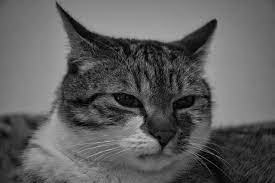

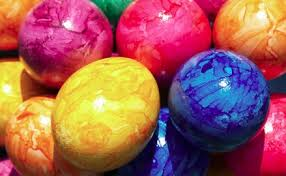

In [ ]:
Image1 = cv2.cv2.imread("/content/gray.jpg")
Image2 = cv2.cv2.imread("/content/rgb.jpg")
cv2_imshow(Image1)
cv2_imshow(Image2)



**2.2**: Using one the functions above, convert Image2 image into an equivalent Grayscale Image and plot it.

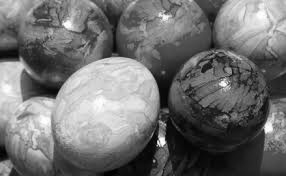

In [ ]:
rgb2g = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(rgb2g)

**2.3**: Perform Z-Score Normalization on Image1 by calling the function made in Task 1. Save this image as a .jpg img on
disk.

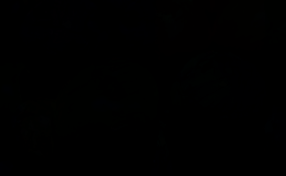

True

In [ ]:
Image1_z = Z_normalization(Image2)
#stats.zscore(Image1)
cv2_imshow(Image1_z)
cv2.imwrite("/content/Image1_z.jpg", Image1_z)



# Task 3 - Image Transformations

In this task you are going to perform the following operations on Image2.

The following functions would be relevant:



```
ndimage.rotate(loaded_img, rotation_degree)
cv2.resize(loaded_img, dim, interpolation = cv2.INTER_AREA)
cv2.resize(image2, None, fx= scale_factor_width, fy= scale_factor_height, interpolation= cv2.INTER_LINEAR)

for a given region of interest, edges of Region of interest from (x,y) to (xi,yi)
crop the image using:
cropped_image=loaded_img[x:x+xi,y:y+yi]

```



**3.1**: Rotate the image by a randomly generated value between 0 degrees and 180 degrees.

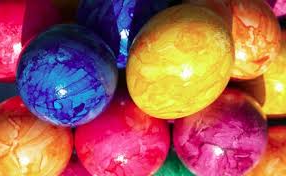

In [ ]:
random_num = random.randrange(0,180)
Image2_rotate = cv2.rotate(Image2, cv2.ROTATE_180)
cv2_imshow(Image2_rotate)




                           

**3.2**: Extract the central region of the image (of half the shape of the original image). Resize this region
to shape
(240, 240) .

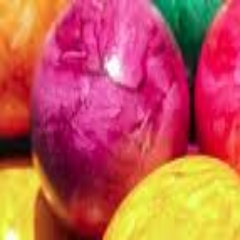

In [ ]:
x=0
y=0
xi=int(Image2.shape[0]/2)
yi=int(Image2.shape[1]/2)
crop = Image2[x:x+xi,y:y+yi]
Image2_rsize = cv2.resize(crop,(240,240))
cv2_imshow(Image2_rsize)





**3.3:** Zoom into the original image by a factor of
1.5 .
Ensure that the size of this new image is the same
as that of the original image (crop if needed).

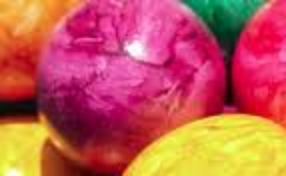

(176, 286, 3)
(176, 286, 3)


In [ ]:
Image2_zoom = cv2.resize(Image2, None, fx= 1.5, fy= 1.5, interpolation= cv2.INTER_LINEAR)
Image2_zrsize = cv2.resize(crop,(286,176))
cv2_imshow(Image2_zrsize)
print(Image2_zrsize.shape)
print(Image2.shape)

**3.4**: Add noise to image intensities, sampled from a standard normal distribution, i.e. Image2 i,j,k = Image2 i,j,k + n i,j,k

where

n i,j,k ∼ N (0, 20) .

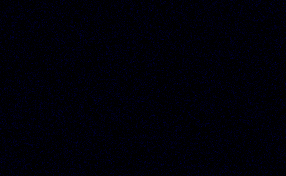

In [ ]:

Image2_noise=cv2.randn(Image2,0,20)
cv2_imshow(Image2_noise)
